In [2]:
import pandas as pd

telemetry = pd.read_csv('PdM_telemetry.csv')
errors = pd.read_csv('PdM_errors.csv')
maint = pd.read_csv('PdM_maint.csv')
failures = pd.read_csv('PdM_failures.csv')
machines = pd.read_csv('PdM_machines.csv')

In [3]:
# format datetime field which comes in as string
telemetry['datetime'] = pd.to_datetime(telemetry['datetime'], format="%Y-%m-%d %H:%M:%S")

print("Total number of telemetry records: %d" % len(telemetry.index))
print(telemetry.head())
telemetry.describe()

Total number of telemetry records: 11709
             datetime  machineID        volt      rotate    pressure  \
0 2015-01-01 06:00:00          1  176.217853  418.504078  113.077935   
1 2015-01-01 07:00:00          1  162.879223  402.747490   95.460525   
2 2015-01-01 08:00:00          1  170.989902  527.349825   75.237905   
3 2015-01-01 09:00:00          1  162.462833  346.149335  109.248561   
4 2015-01-01 10:00:00          1  157.610021  435.376873  111.886648   

   vibration  
0  45.087686  
1  43.413973  
2  34.178847  
3  41.122144  
4  25.990511  


,datetime,machineID,volt,rotate,pressure,vibration
count,11709,11709.000000,11709.000000,11708.000000,11708.000000,11708.000000
mean,2015-06-02 06:13:27.378939136,1.251772,170.743522,445.596098,100.537143,40.574879
min,2015-01-01 06:00:00,1.000000,112.710507,215.619476,58.733724,22.078087
25%,2015-03-03 05:00:00,1.000000,160.293241,411.328782,93.205890,36.851907
50%,2015-05-03 05:00:00,1.000000,170.495049,447.211024,100.209987,40.417045
75%,2015-09-01 07:00:00,2.000000,180.884953,480.872671,107.238101,44.020259
max,2016-01-01 06:00:00,2.000000,237.938518,636.364569,155.257527,67.633435
std,NaN,0.434050,15.360893,53.060186,10.817984,5.511326


Text(0.5, 0, 'Date')

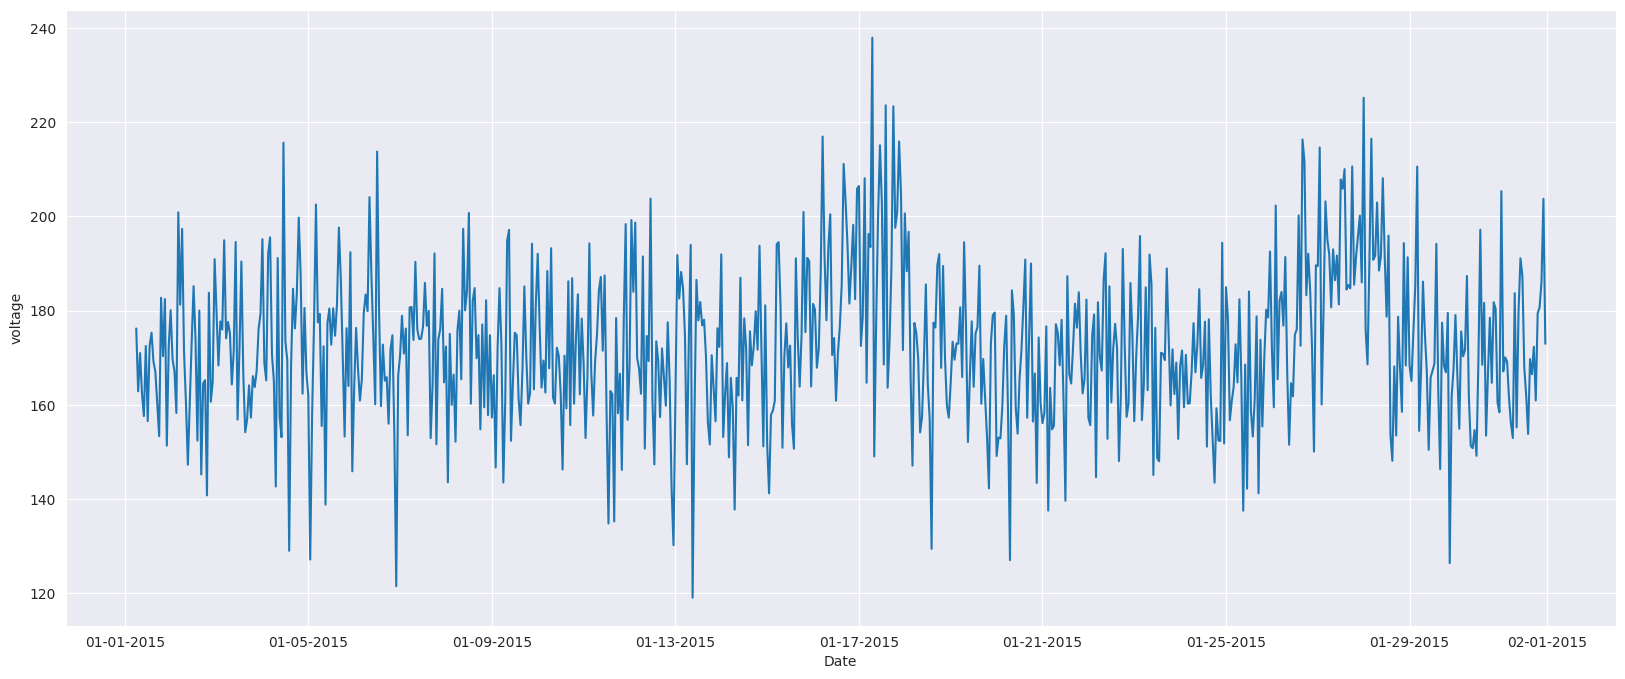

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

plot_df = telemetry.loc[(telemetry['machineID'] == 1) &
                        (telemetry['datetime'] > pd.to_datetime('2015-01-01')) &
                        (telemetry['datetime'] <pd.to_datetime('2015-02-01')),
                        ['datetime','volt']]
sns.set_style("darkgrid")
plt.figure(figsize=(20, 8))
plt.plot(plot_df['datetime'], plot_df['volt'])
plt.ylabel('voltage')

# make x-axis ticks legible
adf = plt.gca().get_xaxis().get_major_formatter()
adf.scaled[1.0] = '%m-%d-%Y'
plt.xlabel('Date')

In [5]:
# format of datetime field which comes in as string
errors['datetime'] = pd.to_datetime(errors['datetime'],format = '%Y-%m-%d %H:%M:%S')
errors['errorID'] = errors['errorID'].astype('category')
print("Total Number of error records: %d" %len(errors.index))
errors.head()


Total Number of error records: 3919


,datetime,machineID,errorID
0,2015-01-03 07:00:00,1,error1
1,2015-01-03 20:00:00,1,error3
2,2015-01-04 06:00:00,1,error5
3,2015-01-10 15:00:00,1,error4
4,2015-01-22 10:00:00,1,error4


errorID
error1    1010
error2     988
error3     838
error4     727
error5     356
Name: count, dtype: int64

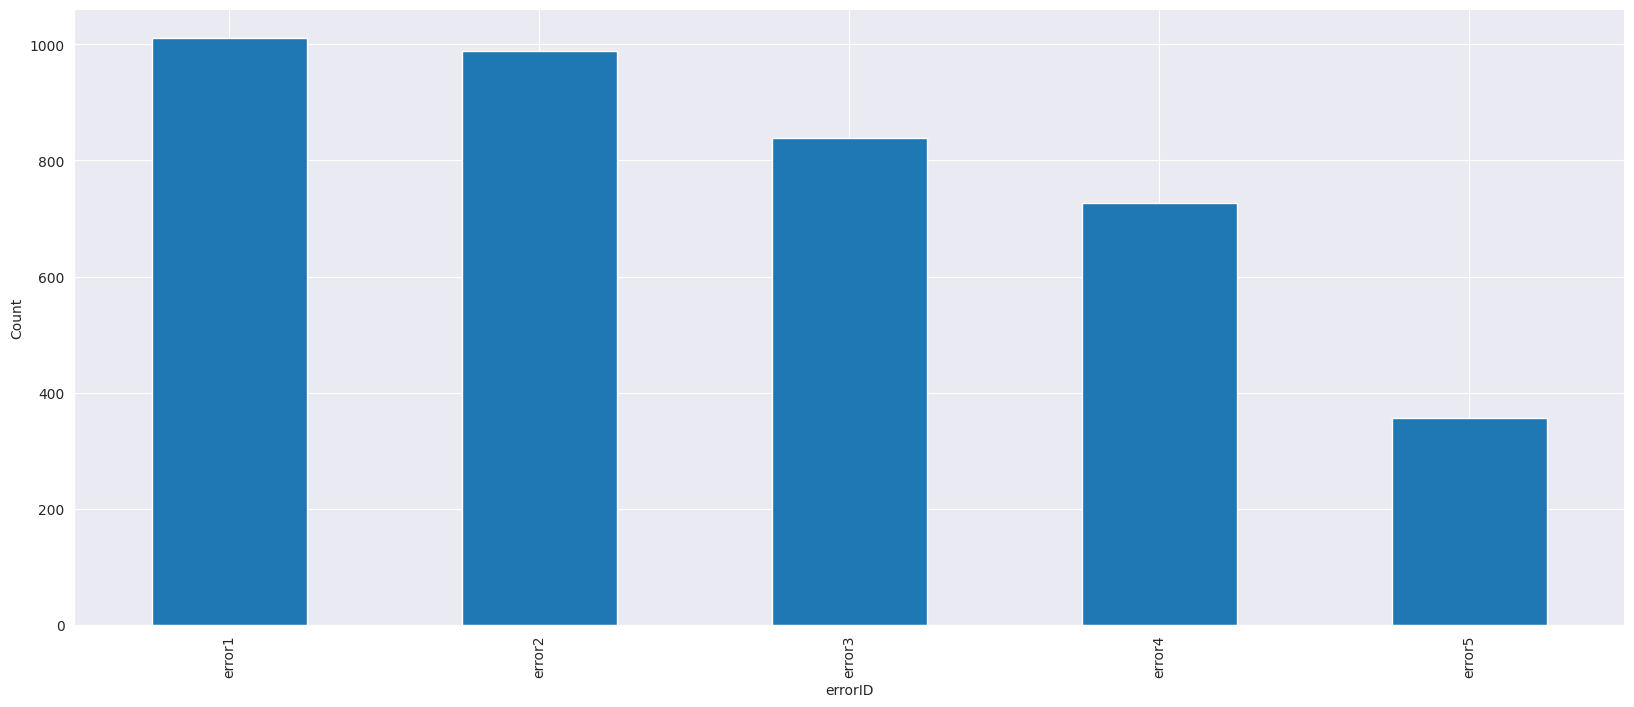

In [6]:
sns.set_style("darkgrid")
plt.figure(figsize=(20, 8))
errors['errorID'].value_counts().plot(kind='bar')
plt.ylabel('Count')
errors['errorID'].value_counts()

In [7]:
maint['datetime'] = pd.to_datetime(maint['datetime'], format='%Y-%m-%d %H:%M:%S')
maint['comp'] = maint['comp'].astype('category')
print("Total Number of maintenance Records: %d" %len(maint.index))
maint.head()

Total Number of maintenance Records: 3286


,datetime,machineID,comp
0,2014-06-01 06:00:00,1,comp2
1,2014-07-16 06:00:00,1,comp4
2,2014-07-31 06:00:00,1,comp3
3,2014-12-13 06:00:00,1,comp1
4,2015-01-05 06:00:00,1,comp4


comp
comp2    863
comp4    811
comp3    808
comp1    804
Name: count, dtype: int64

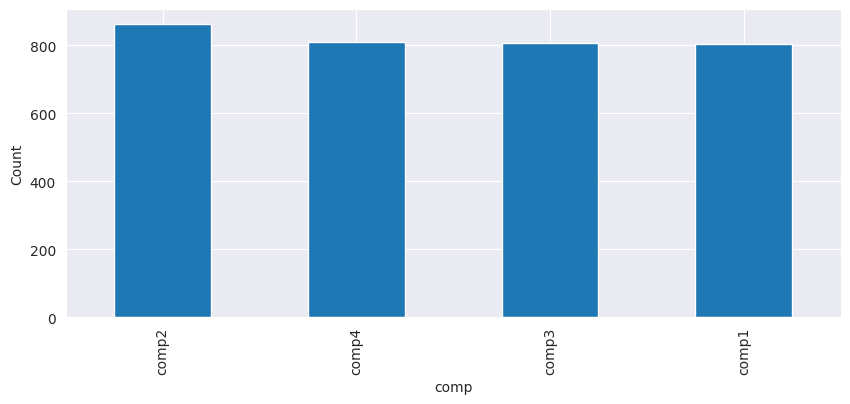

In [8]:
sns.set_style("darkgrid")
plt.figure(figsize=(10, 4))
maint['comp'].value_counts().plot(kind='bar')
plt.ylabel('Count')
maint['comp'].value_counts()

In [9]:
machines['model'] = machines['model'].astype('category')

print("Total number of machines: %d" % len(machines.index))
machines.head()

Total number of machines: 100


,machineID,model,age
0,1,model3,18
1,2,model4,7
2,3,model3,8
3,4,model3,7
4,5,model3,2


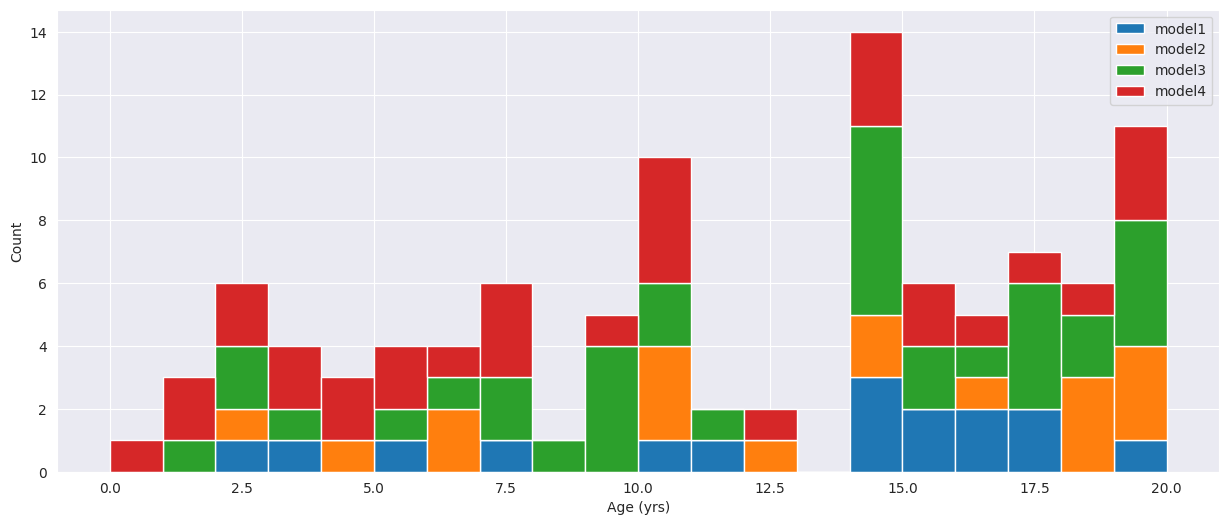

In [10]:
sns.set_style("darkgrid")
plt.figure(figsize=(15, 6))
_, bins, _ = plt.hist([machines.loc[machines['model'] == 'model1', 'age'],
                       machines.loc[machines['model'] == 'model2', 'age'],
                       machines.loc[machines['model'] == 'model3', 'age'],
                       machines.loc[machines['model'] == 'model4', 'age']],
                       20, stacked=True, label=['model1', 'model2', 'model3', 'model4'])
plt.xlabel('Age (yrs)')
plt.ylabel('Count')
plt.legend()

In [11]:
# format datetime field which comes in as string
failures['datetime'] = pd.to_datetime(failures['datetime'], format="%Y-%m-%d %H:%M:%S")
failures['failure'] = failures['failure'].astype('category')

print("Total number of failures: %d" % len(failures.index))
failures.head()

Total number of failures: 761


,datetime,machineID,failure
0,2015-01-05 06:00:00,1,comp4
1,2015-03-06 06:00:00,1,comp1
2,2015-04-20 06:00:00,1,comp2
3,2015-06-19 06:00:00,1,comp4
4,2015-09-02 06:00:00,1,comp4


failure
comp2    259
comp1    192
comp4    179
comp3    131
Name: count, dtype: int64

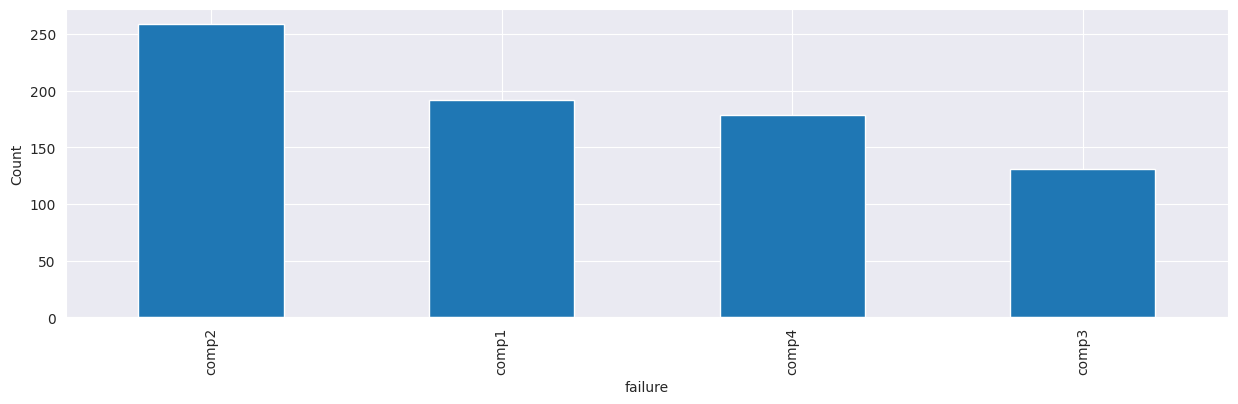

In [12]:
sns.set_style("darkgrid")
plt.figure(figsize=(15, 4))
failures['failure'].value_counts().plot(kind='bar')
plt.ylabel('Count')
failures['failure'].value_counts()

In [14]:
temp = []
fields = ['volt', 'rotate', 'pressure', 'vibration']

for col in fields:
    pivoted = pd.pivot_table(telemetry, index='datetime', columns='machineID', values=col)
    resampled = pivoted.resample('3H', closed='left', label='right').mean().unstack()
    temp.append(resampled)

telemetry_mean_3h = pd.concat(temp, axis=1)
telemetry_mean_3h.columns = [f'{col}_mean_3h' for col in fields]
telemetry_mean_3h.reset_index(inplace=True)

print(telemetry_mean_3h.head())

   machineID            datetime  volt_mean_3h  rotate_mean_3h  \
0          1 2015-01-01 09:00:00    170.028993      449.533798   
1          1 2015-01-01 12:00:00    164.192565      403.949857   
2          1 2015-01-01 15:00:00    168.134445      435.781707   
3          1 2015-01-01 18:00:00    165.514453      430.472823   
4          1 2015-01-01 21:00:00    168.809347      437.111120   

   pressure_mean_3h  vibration_mean_3h  
0         94.592122          40.893502  
1        105.687417          34.255891  
2        107.793709          41.239405  
3        101.703289          40.373739  
4         90.911060          41.738542  


In [16]:

# Assume telemetry is already loaded and datetime is already formatted
# telemetry = pd.read_csv('PdM_telemetry.csv')
# telemetry['datetime'] = pd.to_datetime(telemetry['datetime'], format="%Y-%m-%d %H:%M:%S")

temp_mean = []
temp_std = []
fields = ['volt', 'rotate', 'pressure', 'vibration']

# Compute mean and standard deviation for 3-hour intervals
for col in fields:
    pivoted = pd.pivot_table(telemetry, index='datetime', columns='machineID', values=col)
    resampled_mean = pivoted.resample('3H', closed='left', label='right').mean().unstack()
    resampled_std = pivoted.resample('3H', closed='left', label='right').std().unstack()
    temp_mean.append(resampled_mean)
    temp_std.append(resampled_std)

# Combine the results for mean and standard deviation
telemetry_mean_3h = pd.concat(temp_mean, axis=1)
telemetry_sd_3h = pd.concat(temp_std, axis=1)

# Rename columns
telemetry_mean_3h.columns = [f'{col}_mean_3h' for col in fields]
telemetry_sd_3h.columns = [f'{col}_sd_3h' for col in fields]

# Reset index to make the dataframe easier to work with
telemetry_mean_3h.reset_index(inplace=True)
telemetry_sd_3h.reset_index(inplace=True)

# Display the head of the dataframes
print(telemetry_mean_3h.head())
print(telemetry_sd_3h.head())


   machineID            datetime  volt_mean_3h  rotate_mean_3h  \
0          1 2015-01-01 09:00:00    170.028993      449.533798   
1          1 2015-01-01 12:00:00    164.192565      403.949857   
2          1 2015-01-01 15:00:00    168.134445      435.781707   
3          1 2015-01-01 18:00:00    165.514453      430.472823   
4          1 2015-01-01 21:00:00    168.809347      437.111120   

   pressure_mean_3h  vibration_mean_3h  
0         94.592122          40.893502  
1        105.687417          34.255891  
2        107.793709          41.239405  
3        101.703289          40.373739  
4         90.911060          41.738542  
   machineID            datetime  volt_sd_3h  rotate_sd_3h  pressure_sd_3h  \
0          1 2015-01-01 09:00:00    6.721032     67.849599       18.934956   
1          1 2015-01-01 12:00:00    7.596570     50.120452        8.555032   
2          1 2015-01-01 15:00:00   10.124584     55.084734        5.909721   
3          1 2015-01-01 18:00:00    4.673269 

In [18]:


# Assume telemetry is already loaded and datetime is already formatted
# telemetry = pd.read_csv('PdM_telemetry.csv')
# telemetry['datetime'] = pd.to_datetime(telemetry['datetime'], format="%Y-%m-%d %H:%M:%S")

temp_mean = []
temp_std = []
fields = ['volt', 'rotate', 'pressure', 'vibration']

# Compute 24-hour rolling mean and standard deviation for 3-hour intervals
for col in fields:
    pivoted = pd.pivot_table(telemetry, index='datetime', columns='machineID', values=col)
    rolling_mean = pivoted.rolling(window=24).mean()
    rolling_std = pivoted.rolling(window=24).std()

    resampled_mean = rolling_mean.resample('3H', closed='left', label='right').first().unstack()
    resampled_std = rolling_std.resample('3H', closed='left', label='right').first().unstack()

    temp_mean.append(resampled_mean)
    temp_std.append(resampled_std)

# Combine the results for mean and standard deviation
telemetry_mean_24h = pd.concat(temp_mean, axis=1)
telemetry_sd_24h = pd.concat(temp_std, axis=1)

# Rename columns
telemetry_mean_24h.columns = [f'{col}_mean_24h' for col in fields]
telemetry_sd_24h.columns = [f'{col}_sd_24h' for col in fields]

# Remove rows with null values
telemetry_mean_24h = telemetry_mean_24h.dropna(subset=['volt_mean_24h'])
telemetry_sd_24h = telemetry_sd_24h.dropna(subset=['volt_sd_24h'])

# Reset index to make the dataframe easier to work with
telemetry_mean_24h.reset_index(inplace=True)
telemetry_sd_24h.reset_index(inplace=True)

# Display the head of the dataframes
print(telemetry_mean_24h.head())
print(telemetry_sd_24h.head())


   machineID            datetime  volt_mean_24h  rotate_mean_24h  \
0          1 2015-01-02 06:00:00     169.733809       445.179865   
1          1 2015-01-02 09:00:00     170.614862       446.364859   
2          1 2015-01-02 12:00:00     169.893965       447.009407   
3          1 2015-01-02 15:00:00     171.243444       444.233563   
4          1 2015-01-02 18:00:00     170.792486       448.440437   

   pressure_mean_24h  vibration_mean_24h  
0          96.797113           40.385160  
1          96.849785           39.736826  
2          97.715600           39.498374  
3          96.666060           40.229370  
4          95.766838           40.055214  
   machineID            datetime  volt_sd_24h  rotate_sd_24h  pressure_sd_24h  \
0          1 2015-01-02 06:00:00    11.233120      48.717395        10.079880   
1          1 2015-01-02 09:00:00    12.519402      48.385076        10.171540   
2          1 2015-01-02 12:00:00    13.370357      42.432317         9.471669   
3        

In [20]:


# Assume the dataframes `telemetry_mean_3h`, `telemetry_sd_3h`, `telemetry_mean_24h`, and `telemetry_sd_24h` are already created

# Merge columns of feature sets created earlier using iloc for slicing
telemetry_feat = pd.concat([
    telemetry_mean_3h,
    telemetry_sd_3h.iloc[:, 2:6],
    telemetry_mean_24h.iloc[:, 2:6],
    telemetry_sd_24h.iloc[:, 2:6]
], axis=1).dropna()

# Describe the merged feature set
telemetry_feat_description = telemetry_feat.describe()
print(telemetry_feat_description)


         machineID                       datetime  volt_mean_3h  \
count  3889.000000                           3889   3889.000000   
mean      1.249164  2015-06-02 10:19:14.332733440    170.740533   
min       1.000000            2015-01-01 09:00:00    139.239371   
25%       1.000000            2015-03-03 03:00:00    164.481367   
50%       1.000000            2015-05-03 06:00:00    170.462992   
75%       1.000000            2015-09-01 18:00:00    176.507275   
max       2.000000            2016-01-01 06:00:00    213.241208   
std       0.432585                            NaN      9.390404   

       rotate_mean_3h  pressure_mean_3h  vibration_mean_3h   volt_sd_3h  \
count     3889.000000       3889.000000        3889.000000  3889.000000   
mean       445.575822        100.542660          40.577061    13.212681   
min        278.073828         79.434774          30.465619     0.175760   
25%        426.404954         96.115798          38.259509     8.139771   
50%        447.388281

In [21]:
telemetry_feat.head()

,machineID,datetime,volt_mean_3h,rotate_mean_3h,pressure_mean_3h,vibration_mean_3h,volt_sd_3h,rotate_sd_3h,pressure_sd_3h,vibration_sd_3h,volt_mean_24h,rotate_mean_24h,pressure_mean_24h,vibration_mean_24h,volt_sd_24h,rotate_sd_24h,pressure_sd_24h,vibration_sd_24h
0,1,2015-01-01 09:00:00,170.028993,449.533798,94.592122,40.893502,6.721032,67.849599,18.934956,5.874970,169.733809,445.179865,96.797113,40.385160,11.233120,48.717395,10.079880,5.853209
1,1,2015-01-01 12:00:00,164.192565,403.949857,105.687417,34.255891,7.596570,50.120452,8.555032,7.662229,170.614862,446.364859,96.849785,39.736826,12.519402,48.385076,10.171540,6.163231
2,1,2015-01-01 15:00:00,168.134445,435.781707,107.793709,41.239405,10.124584,55.084734,5.909721,5.169304,169.893965,447.009407,97.715600,39.498374,13.370357,42.432317,9.471669,6.195076
3,1,2015-01-01 18:00:00,165.514453,430.472823,101.703289,40.373739,4.673269,42.047278,4.554047,2.106108,171.243444,444.233563,96.666060,40.229370,13.299281,41.346121,8.731229,5.687944
4,1,2015-01-01 21:00:00,168.809347,437.111120,90.911060,41.738542,14.752132,47.048609,4.244158,2.207884,170.792486,448.440437,95.766838,40.055214,13.954518,43.490234,8.061653,5.898069


In [22]:
errors

,datetime,machineID,errorID
0,2015-01-03 07:00:00,1,error1
1,2015-01-03 20:00:00,1,error3
2,2015-01-04 06:00:00,1,error5
3,2015-01-10 15:00:00,1,error4
4,2015-01-22 10:00:00,1,error4
...,...,...,...
3914,2015-11-21 08:00:00,100,error2
3915,2015-12-04 02:00:00,100,error1
3916,2015-12-08 06:00:00,100,error2
3917,2015-12-08 06:00:00,100,error3


In [23]:
# create a column for each error type
error_count = pd.get_dummies(errors.set_index('datetime')).reset_index()
error_count
error_count.columns = ['datetime', 'machineID', 'error1', 'error2', 'error3', 'error4', 'error5']
error_count.head(13)

,datetime,machineID,error1,error2,error3,error4,error5
0,2015-01-03 07:00:00,1,True,False,False,False,False
1,2015-01-03 20:00:00,1,False,False,True,False,False
2,2015-01-04 06:00:00,1,False,False,False,False,True
3,2015-01-10 15:00:00,1,False,False,False,True,False
4,2015-01-22 10:00:00,1,False,False,False,True,False
5,2015-01-25 15:00:00,1,False,False,False,True,False
6,2015-01-27 04:00:00,1,True,False,False,False,False
7,2015-03-03 22:00:00,1,False,True,False,False,False
8,2015-03-05 06:00:00,1,True,False,False,False,False
9,2015-03-20 18:00:00,1,True,False,False,False,False


In [24]:
# combine errors for a given machine in a given hour
error_count = error_count.groupby(['machineID','datetime']).sum().reset_index()
error_count.head(13)


,machineID,datetime,error1,error2,error3,error4,error5
0,1,2015-01-03 07:00:00,1,0,0,0,0
1,1,2015-01-03 20:00:00,0,0,1,0,0
2,1,2015-01-04 06:00:00,0,0,0,0,1
3,1,2015-01-10 15:00:00,0,0,0,1,0
4,1,2015-01-22 10:00:00,0,0,0,1,0
5,1,2015-01-25 15:00:00,0,0,0,1,0
6,1,2015-01-27 04:00:00,1,0,0,0,0
7,1,2015-03-03 22:00:00,0,1,0,0,0
8,1,2015-03-05 06:00:00,1,0,0,0,0
9,1,2015-03-20 18:00:00,1,0,0,0,0


In [25]:
error_count = telemetry[['datetime', 'machineID']].merge(error_count, on=['machineID', 'datetime'], how='left').fillna(0.0)
error_count.describe()


,datetime,machineID,error1,error2,error3,error4,error5
count,11709,11709.000000,11709.000000,11709.000000,11709.000000,11709.000000,11709.000000
mean,2015-06-02 06:13:27.378939136,1.251772,0.001110,0.000854,0.001025,0.000598,0.000342
min,2015-01-01 06:00:00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015-03-03 05:00:00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2015-05-03 05:00:00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2015-09-01 07:00:00,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2016-01-01 06:00:00,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
std,NaN,0.434050,0.033303,0.029213,0.031998,0.024444,0.018481


In [26]:
temp = []
fields = ['error%d' % i for i in range(1,6)]
for col in fields:
    temp.append(pd.rolling_sum(pd.pivot_table(error_count,
                                               index='datetime',
                                               columns='machineID',
                                               values=col), window=24).resample('3H',
                                                                             closed='left',
                                                                             label='right',
                                                                             how='first').unstack())
error_count = pd.concat(temp, axis=1)
error_count.columns = [i + 'count' for i in fields]
error_count.reset_index(inplace=True)
error_count = error_count.dropna()
error_count.describe()

AttributeError: module 'pandas' has no attribute 'rolling_sum'

In [27]:

# Assume error_count is already loaded and datetime is already formatted
# error_count = pd.read_csv('PdM_errors.csv')
# error_count['datetime'] = pd.to_datetime(error_count['datetime'], format="%Y-%m-%d %H:%M:%S")

temp = []
fields = [f'error{i}' for i in range(1, 6)]

# Compute 24-hour rolling sum and resample to 3-hour intervals
for col in fields:
    pivoted = pd.pivot_table(error_count, index='datetime', columns='machineID', values=col)
    rolling_sum = pivoted.rolling(window=24).sum()

    resampled_sum = rolling_sum.resample('3H', closed='left', label='right').first().unstack()
    temp.append(resampled_sum)

# Combine the results
error_count = pd.concat(temp, axis=1)

# Rename columns
error_count.columns = [f'{col}_count' for col in fields]

# Reset index to make the dataframe easier to work with
error_count.reset_index(inplace=True)

# Remove rows with null values
error_count = error_count.dropna()

# Describe the dataframe
error_count_description = error_count.describe()
print(error_count_description)


         machineID                       datetime  error1_count  error2_count  \
count  3890.000000                           3890   3890.000000   3890.000000   
mean      1.250900  2015-06-02 22:08:04.010282752      0.026735      0.020566   
min       1.000000            2015-01-02 06:00:00      0.000000      0.000000   
25%       1.000000            2015-03-04 00:00:00      0.000000      0.000000   
50%       1.000000            2015-05-03 18:00:00      0.000000      0.000000   
75%       2.000000            2015-09-01 20:15:00      0.000000      0.000000   
max       2.000000            2016-01-01 09:00:00      1.000000      1.000000   
std       0.433587                            NaN      0.161329      0.141943   

       error3_count  error4_count  error5_count  
count   3890.000000   3890.000000   3890.000000  
mean       0.024679      0.014396      0.008226  
min        0.000000      0.000000      0.000000  
25%        0.000000      0.000000      0.000000  
50%        0.000000 

In [28]:
import numpy as np

# create a column for each error type
comp_rep = pd.get_dummies(maint.set_index('datetime')).reset_index()
comp_rep.columns = ['datetime', 'machineID', 'comp1', 'comp2', 'comp3', 'comp4']

# combine repairs for a given machine in a given hour
comp_rep = comp_rep.groupby(['machineID', 'datetime']).sum().reset_index()

# add timepoints where no components were replaced
comp_rep = telemetry[['datetime', 'machineID']].merge(comp_rep,
                                                      on=['datetime', 'machineID'],
                                                      how='outer').fillna(0).sort_values(by=['machineID', 'datetime'])

components = ['comp1', 'comp2', 'comp3', 'comp4']
for comp in components:
    # convert indicator to most recent date of component change
    comp_rep.loc[comp_rep[comp] < 1, comp] = None
    comp_rep.loc[-comp_rep[comp].isnull(), comp] = comp_rep.loc[-comp_rep[comp].isnull(), 'datetime']

    # forward-fill the most-recent date of component change
    comp_rep[comp] = comp_rep[comp].fillna(method='ffill')

# remove dates in 2014 (may have NaN or future component change dates)
comp_rep = comp_rep.loc[comp_rep['datetime'] > pd.to_datetime('2015-01-01')]

# replace dates of most recent component change with days since most recent component change
for comp in components:
    comp_rep[comp] = (comp_rep['datetime'] - comp_rep[comp]) / np.timedelta64(1, 'D')

comp_rep.describe()

<ipython-input-28-960491863f98>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comp_rep[comp] = (comp_rep['datetime'] - comp_rep[comp]) / np.timedelta64(1, 'D')


,datetime,machineID,comp1,comp2,comp3,comp4
count,13840,13840.000000,13840.000000,13840.000000,13840.000000,13840.000000
mean,2015-06-07 12:19:42.485549312,8.953974,58.812530,91.370984,57.293238,38.279582
min,2015-01-01 06:00:00,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2015-03-07 05:00:00,1.000000,11.375000,11.166667,11.500000,11.458333
50%,2015-05-15 15:30:00,1.000000,27.541667,31.000000,28.166667,28.020833
75%,2015-09-07 09:15:00,2.000000,65.052083,184.385417,96.927083,51.343750
max,2016-01-01 06:00:00,100.000000,477.000000,325.000000,356.000000,380.000000
std,NaN,21.247137,77.280218,104.031395,61.569979,38.202986


In [29]:
comp_rep.head()


,datetime,machineID,comp1,comp2,comp3,comp4
0,2015-01-01 06:00:00,1,19.000000,214.000000,154.000000,169.000000
1,2015-01-01 07:00:00,1,19.041667,214.041667,154.041667,169.041667
2,2015-01-01 08:00:00,1,19.083333,214.083333,154.083333,169.083333
3,2015-01-01 09:00:00,1,19.125000,214.125000,154.125000,169.125000
4,2015-01-01 10:00:00,1,19.166667,214.166667,154.166667,169.166667


In [30]:
telemetry_feat


,machineID,datetime,volt_mean_3h,rotate_mean_3h,pressure_mean_3h,vibration_mean_3h,volt_sd_3h,rotate_sd_3h,pressure_sd_3h,vibration_sd_3h,volt_mean_24h,rotate_mean_24h,pressure_mean_24h,vibration_mean_24h,volt_sd_24h,rotate_sd_24h,pressure_sd_24h,vibration_sd_24h
0,1,2015-01-01 09:00:00,170.028993,449.533798,94.592122,40.893502,6.721032,67.849599,18.934956,5.874970,169.733809,445.179865,96.797113,40.385160,11.233120,48.717395,10.079880,5.853209
1,1,2015-01-01 12:00:00,164.192565,403.949857,105.687417,34.255891,7.596570,50.120452,8.555032,7.662229,170.614862,446.364859,96.849785,39.736826,12.519402,48.385076,10.171540,6.163231
2,1,2015-01-01 15:00:00,168.134445,435.781707,107.793709,41.239405,10.124584,55.084734,5.909721,5.169304,169.893965,447.009407,97.715600,39.498374,13.370357,42.432317,9.471669,6.195076
3,1,2015-01-01 18:00:00,165.514453,430.472823,101.703289,40.373739,4.673269,42.047278,4.554047,2.106108,171.243444,444.233563,96.666060,40.229370,13.299281,41.346121,8.731229,5.687944
4,1,2015-01-01 21:00:00,168.809347,437.111120,90.911060,41.738542,14.752132,47.048609,4.244158,2.207884,170.792486,448.440437,95.766838,40.055214,13.954518,43.490234,8.061653,5.898069
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3885,2,2015-05-01 21:00:00,169.307611,440.635079,89.270907,37.455632,11.959253,59.768921,19.963442,3.674162,173.714012,453.732336,98.663359,40.162479,11.687653,49.243310,12.785128,5.597464
3886,2,2015-05-02 00:00:00,187.197917,431.471975,96.459768,45.863046,16.914626,30.374542,6.548581,2.855150,172.719028,454.117289,98.197590,40.139491,14.745870,48.169041,12.881907,5.596578
3887,2,2015-05-02 03:00:00,168.560285,417.066879,108.429485,40.296367,8.779795,41.424586,9.682252,8.548208,171.610077,451.875622,99.528331,39.401265,13.935009,50.067305,11.878831,4.801985
3888,2,2015-05-02 06:00:00,163.714504,434.533616,96.241345,42.345245,3.257715,62.014575,0.746706,2.019473,171.126138,458.057233,98.542303,39.957654,15.475168,50.897169,11.978234,5.395352


In [31]:
final_feat = telemetry_feat.merge(error_count, on=['datetime', 'machineID'], how='left')
final_feat = final_feat.merge(comp_rep, on=['datetime', 'machineID'], how='left')
final_feat = final_feat.merge(machines, on=['machineID'], how='left')

print(final_feat.head())
final_feat.describe()

   machineID            datetime  volt_mean_3h  rotate_mean_3h  \
0          1 2015-01-01 09:00:00    170.028993      449.533798   
1          1 2015-01-01 12:00:00    164.192565      403.949857   
2          1 2015-01-01 15:00:00    168.134445      435.781707   
3          1 2015-01-01 18:00:00    165.514453      430.472823   
4          1 2015-01-01 21:00:00    168.809347      437.111120   

   pressure_mean_3h  vibration_mean_3h  volt_sd_3h  rotate_sd_3h  \
0         94.592122          40.893502    6.721032     67.849599   
1        105.687417          34.255891    7.596570     50.120452   
2        107.793709          41.239405   10.124584     55.084734   
3        101.703289          40.373739    4.673269     42.047278   
4         90.911060          41.738542   14.752132     47.048609   

   pressure_sd_3h  vibration_sd_3h  ...  error2_count  error3_count  \
0       18.934956         5.874970  ...           NaN           NaN   
1        8.555032         7.662229  ...           Na

,machineID,datetime,volt_mean_3h,rotate_mean_3h,pressure_mean_3h,vibration_mean_3h,volt_sd_3h,rotate_sd_3h,pressure_sd_3h,vibration_sd_3h,...,error1_count,error2_count,error3_count,error4_count,error5_count,comp1,comp2,comp3,comp4,age
count,3889.000000,3889,3889.000000,3889.000000,3889.000000,3889.000000,3889.000000,3889.000000,3889.000000,3889.000000,...,3875.000000,3875.000000,3875.000000,3875.000000,3875.000000,3889.000000,3889.000000,3889.000000,3889.000000,3889.000000
mean,1.249164,2015-06-02 10:19:14.332733440,170.740533,445.575822,100.542660,40.577061,13.212681,44.367203,8.865723,4.480451,...,0.026839,0.020645,0.024774,0.014452,0.008258,61.904892,101.208055,60.335080,37.667299,15.259193
min,1.000000,2015-01-01 09:00:00,139.239371,278.073828,79.434774,30.465619,0.175760,1.548842,0.063137,0.083811,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000
25%,1.000000,2015-03-03 03:00:00,164.481367,426.404954,96.115798,38.259509,8.139771,26.608827,5.384139,2.726667,...,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,12.125000,12.125000,12.125000,18.000000
50%,1.000000,2015-05-03 06:00:00,170.462992,447.388281,100.055842,40.228014,12.312089,41.822835,8.249327,4.176332,...,0.000000,0.000000,0.000000,0.000000,0.000000,27.500000,36.250000,28.250000,28.125000,18.000000
75%,1.000000,2015-09-01 18:00:00,176.507275,468.080790,104.136745,42.394237,17.410205,59.246161,11.881115,5.988770,...,0.000000,0.000000,0.000000,0.000000,0.000000,67.625000,203.250000,109.125000,50.625000,18.000000
max,2.000000,2016-01-01 06:00:00,213.241208,537.591759,142.172789,63.426830,44.441862,137.189190,29.892008,14.318794,...,1.000000,1.000000,2.000000,1.000000,1.000000,275.875000,322.875000,200.875000,172.875000,18.000000
std,0.432585,NaN,9.390404,33.870559,7.119608,3.664883,6.876182,23.184735,4.568499,2.312999,...,0.161633,0.142212,0.166675,0.119358,0.090510,79.698870,107.950081,62.047916,34.091093,4.758432


In [33]:
import pandas as pd

# Merge final_feat and failures dataframes
labeled_features = final_feat.merge(failures, on=['datetime', 'machineID'], how='left')

# Fill missing values with backward filling up to 7 rows (24 hours)
labeled_features = labeled_features.fillna(method='bfill', limit=7)

# Check the data types and categories of the 'failure' column
print(labeled_features['failure'].dtype)
print(labeled_features['failure'].cat.categories)

# Ensure 'none' is a valid category in 'failure' column
if 'none' not in labeled_features['failure'].cat.categories:
    labeled_features['failure'] = labeled_features['failure'].cat.add_categories(['none'])

# Fill missing values with 'none'
labeled_features['failure'] = labeled_features['failure'].fillna('none')

# Display the first few rows of the labeled_features dataframe
print(labeled_features.head())


category
Index(['comp1', 'comp2', 'comp3', 'comp4'], dtype='object')
   machineID            datetime  volt_mean_3h  rotate_mean_3h  \
0          1 2015-01-01 09:00:00    170.028993      449.533798   
1          1 2015-01-01 12:00:00    164.192565      403.949857   
2          1 2015-01-01 15:00:00    168.134445      435.781707   
3          1 2015-01-01 18:00:00    165.514453      430.472823   
4          1 2015-01-01 21:00:00    168.809347      437.111120   

   pressure_mean_3h  vibration_mean_3h  volt_sd_3h  rotate_sd_3h  \
0         94.592122          40.893502    6.721032     67.849599   
1        105.687417          34.255891    7.596570     50.120452   
2        107.793709          41.239405   10.124584     55.084734   
3        101.703289          40.373739    4.673269     42.047278   
4         90.911060          41.738542   14.752132     47.048609   

   pressure_sd_3h  vibration_sd_3h  ...  error3_count  error4_count  \
0       18.934956         5.874970  ...           0.0 

In [34]:
labeled_features.loc[labeled_features['failure'] == 'comp4'][:16]


,machineID,datetime,volt_mean_3h,rotate_mean_3h,pressure_mean_3h,vibration_mean_3h,volt_sd_3h,rotate_sd_3h,pressure_sd_3h,vibration_sd_3h,...,error3_count,error4_count,error5_count,comp1,comp2,comp3,comp4,model,age,failure
24,1,2015-01-04 09:00:00,166.281848,453.787824,106.187582,51.990080,24.276228,23.621315,11.176731,3.394073,...,1.0,0.0,1.0,22.125,217.125,157.125,172.125,model3,18,comp4
25,1,2015-01-04 12:00:00,175.412103,445.450581,100.887363,54.251534,34.918687,11.001625,10.580336,2.921501,...,1.0,0.0,1.0,22.250,217.250,157.250,172.250,model3,18,comp4
26,1,2015-01-04 15:00:00,157.347716,451.882075,101.289380,48.602686,24.617739,28.950883,9.966729,2.356486,...,1.0,0.0,1.0,22.375,217.375,157.375,172.375,model3,18,comp4
27,1,2015-01-04 18:00:00,176.450550,446.033068,84.521555,47.638836,8.071400,76.511343,2.636879,4.108621,...,1.0,0.0,1.0,22.500,217.500,157.500,172.500,model3,18,comp4
28,1,2015-01-04 21:00:00,190.325814,422.692565,107.393234,49.552856,8.390777,7.176553,4.262645,7.598552,...,1.0,0.0,1.0,22.625,217.625,157.625,172.625,model3,18,comp4
29,1,2015-01-05 00:00:00,169.985134,458.929418,91.494362,54.882021,9.451483,12.052752,3.685906,6.621183,...,0.0,0.0,1.0,22.750,217.750,157.750,172.750,model3,18,comp4
30,1,2015-01-05 03:00:00,149.082619,412.180336,93.509785,54.386079,19.075952,30.715081,3.090266,6.530610,...,0.0,0.0,1.0,22.875,217.875,157.875,172.875,model3,18,comp4
31,1,2015-01-05 06:00:00,185.782709,439.531288,99.413660,51.558082,14.495664,45.663743,4.289212,7.330397,...,0.0,0.0,1.0,0.000,218.000,158.000,0.000,model3,18,comp4
1344,1,2015-06-18 09:00:00,169.324639,453.923471,101.313249,53.092274,28.155693,42.557599,7.688674,2.488851,...,0.0,0.0,1.0,89.125,29.125,14.125,134.125,model3,18,comp4
1345,1,2015-06-18 12:00:00,190.691297,441.577271,97.192512,44.025425,6.296827,47.271008,7.577957,4.648336,...,0.0,0.0,1.0,89.250,29.250,14.250,134.250,model3,18,comp4


In [36]:
from sklearn.ensemble import GradientBoostingClassifier

# Assuming labeled_features is already defined and contains the relevant data

# Define threshold dates for training and testing splits
threshold_dates = [
    [pd.to_datetime('2015-07-31 01:00:00'), pd.to_datetime('2015-08-01 01:00:00')],
    [pd.to_datetime('2015-08-31 01:00:00'), pd.to_datetime('2015-09-01 01:00:00')],
    [pd.to_datetime('2015-09-30 01:00:00'), pd.to_datetime('2015-10-01 01:00:00')]
]

test_results = []
models = []

for last_train_date, first_test_date in threshold_dates:
    # Split out training and test data
    train_y = labeled_features.loc[labeled_features['datetime'] < last_train_date, 'failure']
    train_X = pd.get_dummies(labeled_features.loc[labeled_features['datetime'] < last_train_date].drop(columns=['datetime', 'machineID', 'failure']))
    test_X = pd.get_dummies(labeled_features.loc[labeled_features['datetime'] > first_test_date].drop(columns=['datetime', 'machineID', 'failure']))

    # Train and predict using the model, storing results for later
    my_model = GradientBoostingClassifier(random_state=42)
    my_model.fit(train_X, train_y)

    # Create a dataframe for test results
    test_result = labeled_features.loc[labeled_features['datetime'] > first_test_date].copy()
    test_result['predicted_failure'] = my_model.predict(test_X)

    test_results.append(test_result)
    models.append(my_model)

# Optionally, you can print or use test_results and models for further analysis
print(test_results)
print(models)


[      machineID            datetime  volt_mean_3h  rotate_mean_3h  \
1694          1 2015-08-01 03:00:00    157.906797      436.223066   
1695          1 2015-08-01 06:00:00    177.484300      474.384707   
1696          1 2015-08-01 09:00:00    160.722230      454.141020   
1697          1 2015-08-01 12:00:00    164.327403      483.343506   
1698          1 2015-08-01 15:00:00    168.114265      459.958711   
...         ...                 ...           ...             ...   
2915          1 2015-12-31 18:00:00    165.377347      427.904798   
2916          1 2015-12-31 21:00:00    173.823921      411.557599   
2917          1 2016-01-01 00:00:00    159.011758      494.917558   
2918          1 2016-01-01 03:00:00    161.803419      433.438436   
2919          1 2016-01-01 06:00:00    177.076824      425.010191   

      pressure_mean_3h  vibration_mean_3h  volt_sd_3h  rotate_sd_3h  \
1694         99.668710          41.927731   14.311694     48.891917   
1695         95.465206      

Text(0, 0.5, 'Importance')

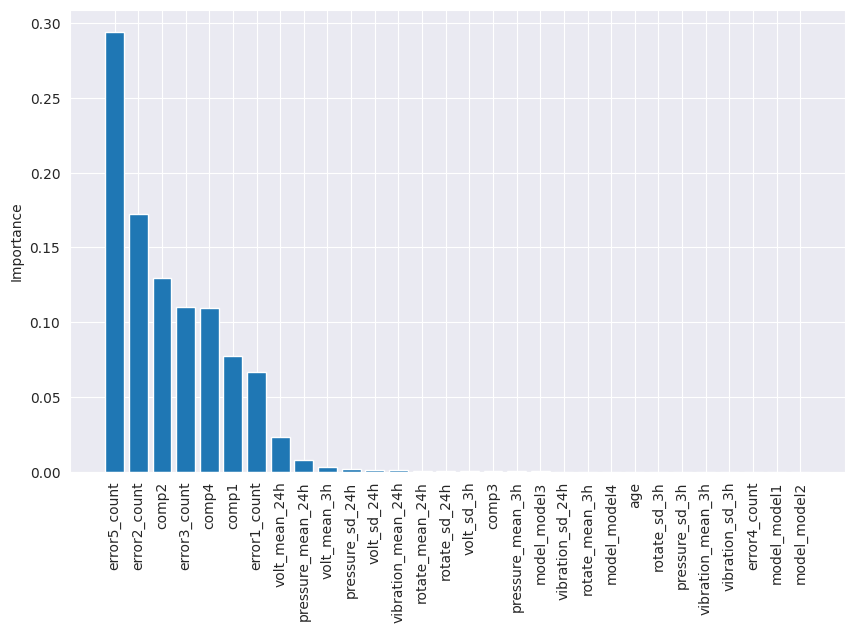

In [37]:
sns.set_style("darkgrid")
plt.figure(figsize=(10, 6))
labels, importances = zip(*sorted(zip(test_X.columns, models[0].feature_importances_), reverse=True, key=lambda x: x[1]))
plt.xticks(range(len(labels)), labels)
_, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.bar(range(len(importances)), importances)
plt.ylabel('Importance')

Text(0, 0.5, 'Count')

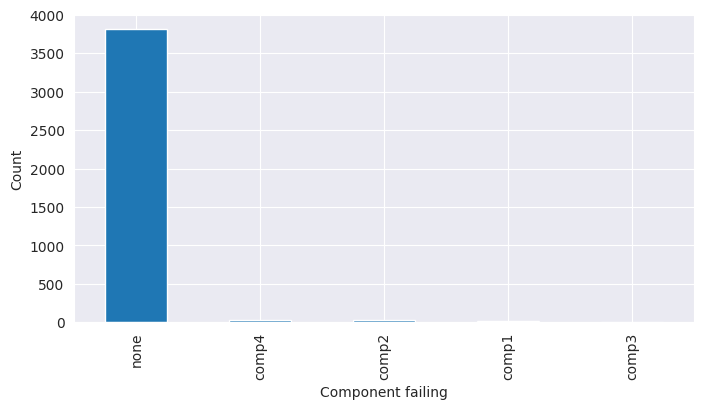

In [38]:
sns.set_style("darkgrid")
plt.figure(figsize=(8, 4))
labeled_features['failure'].value_counts().plot(kind='bar')
plt.xlabel('Component failing')
plt.ylabel('Count')

In [39]:
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score, precision_score

def Evaluate(predicted, actual, labels):
    output_labels = []
    output = []

    # Calculate and display confusion matrix
    cm = confusion_matrix(actual, predicted, labels=labels)
    print('Confusion matrix\n- x-axis is true labels (none, comp1, etc.)\n- y-axis is predicted labels')
    print(cm)

    # Calculate precision, recall, and F1 score
    accuracy = np.array([float(np.trace(cm)) / np.sum(cm)] * len(labels))
    precision = precision_score(actual, predicted, average=None, labels=labels)
    recall = recall_score(actual, predicted, average=None, labels=labels)
    f1 = 2 * precision * recall / (precision + recall)
    output.extend([accuracy.tolist(), precision.tolist(), recall.tolist(), f1.tolist()])
    output_labels.extend(['accuracy', 'precision', 'recall', 'F1'])

    # Calculate the macro versions of these metrics
    output.extend([[np.mean(precision)] * len(labels),
                   [np.mean(recall)] * len(labels),
                   [np.mean(f1)] * len(labels)])
    output_labels.extend(['macro precision', 'macro recall', 'macro F1'])

    # Find the one-vs.-all confusion matrix
    cm_row_sums = cm.sum(axis = 1)
    cm_col_sums = cm.sum(axis = 0)
    s = np.zeros((2, 2))
    for i in range(len(labels)):
        v = np.array([[cm[i, i],
                       cm_row_sums[i] - cm[i, i]],
                      [cm_col_sums[i] - cm[i, i],
                       np.sum(cm) + cm[i, i] - (cm_row_sums[i] + cm_col_sums[i])]])
        s += v
    s_row_sums = s.sum(axis = 1)

    # Add average accuracy and micro-averaged  precision/recall/F1
    avg_accuracy = [np.trace(s) / np.sum(s)] * len(labels)
    micro_prf = [float(s[0,0]) / s_row_sums[0]] * len(labels)
    output.extend([avg_accuracy, micro_prf])
    output_labels.extend(['average accuracy',
                          'micro-averaged precision/recall/F1'])

    # Compute metrics for the majority classifier
    mc_index = np.where(cm_row_sums == np.max(cm_row_sums))[0][0]
    cm_row_dist = cm_row_sums / float(np.sum(cm))
    mc_accuracy = 0 * cm_row_dist; mc_accuracy[mc_index] = cm_row_dist[mc_index]
    mc_recall = 0 * cm_row_dist; mc_recall[mc_index] = 1
    mc_precision = 0 * cm_row_dist
    mc_precision[mc_index] = cm_row_dist[mc_index]
    mc_F1 = 0 * cm_row_dist;
    mc_F1[mc_index] = 2 * mc_precision[mc_index] / (mc_precision[mc_index] + 1)
    output.extend([mc_accuracy.tolist(), mc_recall.tolist(),
                   mc_precision.tolist(), mc_F1.tolist()])
    output_labels.extend(['majority class accuracy', 'majority class recall',
                          'majority class precision', 'majority class F1'])

    # Random accuracy and kappa
    cm_col_dist = cm_col_sums / float(np.sum(cm))
    exp_accuracy = np.array([np.sum(cm_row_dist * cm_col_dist)] * len(labels))
    kappa = (accuracy - exp_accuracy) / (1 - exp_accuracy)
    output.extend([exp_accuracy.tolist(), kappa.tolist()])
    output_labels.extend(['expected accuracy', 'kappa'])


    # Random guess
    rg_accuracy = np.ones(len(labels)) / float(len(labels))
    rg_precision = cm_row_dist
    rg_recall = np.ones(len(labels)) / float(len(labels))
    rg_F1 = 2 * cm_row_dist / (len(labels) * cm_row_dist + 1)
    output.extend([rg_accuracy.tolist(), rg_precision.tolist(),
                   rg_recall.tolist(), rg_F1.tolist()])
    output_labels.extend(['random guess accuracy', 'random guess precision',
                          'random guess recall', 'random guess F1'])

    # Random weighted guess
    rwg_accuracy = np.ones(len(labels)) * sum(cm_row_dist**2)
    rwg_precision = cm_row_dist
    rwg_recall = cm_row_dist
    rwg_F1 = cm_row_dist
    output.extend([rwg_accuracy.tolist(), rwg_precision.tolist(),
                   rwg_recall.tolist(), rwg_F1.tolist()])
    output_labels.extend(['random weighted guess accuracy',
                          'random weighted guess precision',
                          'random weighted guess recall',
                          'random weighted guess F1'])

    output_df = pd.DataFrame(output, columns=labels)
    output_df.index = output_labels

    return output_df

In [40]:
evaluation_results = []
for i, test_result in enumerate(test_results):
    print('\nSplit %d:' % (i+1))
    evaluation_result = Evaluate(actual = test_result['failure'],
                                 predicted = test_result['predicted_failure'],
                                 labels = ['none', 'comp1', 'comp2', 'comp3', 'comp4'])
    evaluation_results.append(evaluation_result)
evaluation_results[0]  # show full results for first split only


Split 1:
Confusion matrix
- x-axis is true labels (none, comp1, etc.)
- y-axis is predicted labels
[[1202    0    0    0    0]
 [   0    0    0    0    0]
 [   0    0    8    0    0]
 [   0    0    0    0    0]
 [   0    0    0    0   16]]

Split 2:
Confusion matrix
- x-axis is true labels (none, comp1, etc.)
- y-axis is predicted labels
[[954   0   0   0   0]
 [  0   0   0   0   0]
 [  7   0   1   0   0]
 [  0   0   0   0   0]
 [  0   0   0   0  16]]

Split 3:
Confusion matrix
- x-axis is true labels (none, comp1, etc.)
- y-axis is predicted labels
[[722   0   0   0   0]
 [  0   0   0   0   0]
 [  0   0   8   0   0]
 [  0   0   0   0   0]
 [  0   0   0   0   8]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
<ipython-input-39-f06044c26761>:16: RuntimeWarning: invalid value encountered in divide
  f1 = 2 * precision * recall / (precision + recall)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

,none,comp1,comp2,comp3,comp4
accuracy,1.000000,1.000000,1.000000,1.000000,1.000000
precision,1.000000,0.000000,1.000000,0.000000,1.000000
recall,1.000000,0.000000,1.000000,0.000000,1.000000
F1,1.000000,NaN,1.000000,NaN,1.000000
macro precision,0.600000,0.600000,0.600000,0.600000,0.600000
macro recall,0.600000,0.600000,0.600000,0.600000,0.600000
macro F1,NaN,NaN,NaN,NaN,NaN
average accuracy,1.000000,1.000000,1.000000,1.000000,1.000000
micro-averaged precision/recall/F1,1.000000,1.000000,1.000000,1.000000,1.000000
majority class accuracy,0.980424,0.000000,0.000000,0.000000,0.000000
